In [25]:
# imports
import time
import sklearn
import pandas as pd
import numpy
import multiprocess as mp
import swifter

from PIL import Image, ImageOps, ImageEnhance
from skimage.feature import hog
from matplotlib import cm
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics import recall_score, precision_score, make_scorer, roc_curve, roc_auc_score


# directorios
raw_dir = '../data/raw/raw_xrays'

filtered_raw_dir = '../data/raw/filtered_xrays'

raw_128_dir = '../data/raw/128'

processed_csv_path = '../data/processed/filtered.txt'

def features_csv_path(orient, pixels, cells):
    return f'../data/processed/or{orient}pix{pixels}cell{cells}'

hogged_imgs_dir = '../data/processed/hogged'

train_fd_csv_path = '../data/processed/train_fd.txt'
test_fd_csv_path = '../data/processed/test_fd.txt'

train_hoged_imgs_csv_path = '../data/processed/train_hogged.txt'
test_hoged_imgs_csv_path = '../data/processed/test_hogged.txt'

seed = 14061996
numpy.random.seed(seed)

In [2]:
df = pd.read_csv(processed_csv_path, delimiter = ',', header='infer')

In [3]:
df.head(10)

,Unnamed: 0,patient_id,image_id,disease,method
0,540,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,003d8fa0-6bf1-40ed-b54c-ac657f8495c5.png,normal,rsna
1,541,009eb222-eabc-4150-8121-d5a6d06b8ebf,009eb222-eabc-4150-8121-d5a6d06b8ebf.png,normal,rsna
2,542,01027bc3-dc40-4165-a6c3-d6be2cb7ca34,01027bc3-dc40-4165-a6c3-d6be2cb7ca34.png,normal,rsna
3,543,017c7b5b-618e-4bc9-943c-04c6a988d992,017c7b5b-618e-4bc9-943c-04c6a988d992.png,normal,rsna
4,544,019ca122-9cdf-4704-b7a9-449c8a1c263e,019ca122-9cdf-4704-b7a9-449c8a1c263e.png,normal,rsna
5,545,01a4059c-22f7-4f51-8a27-50aff0b3aeb3,01a4059c-22f7-4f51-8a27-50aff0b3aeb3.png,normal,rsna
6,546,01aad2a6-3b93-45e3-bf37-2d73348cb6fc,01aad2a6-3b93-45e3-bf37-2d73348cb6fc.png,normal,rsna
7,547,01b15f07-1149-4ff8-9756-bc821e41b97c,01b15f07-1149-4ff8-9756-bc821e41b97c.png,normal,rsna
8,548,01be3fe5-4a91-4c57-9af6-305966a7d0aa,01be3fe5-4a91-4c57-9af6-305966a7d0aa.png,normal,rsna
9,549,01c0b605-0a82-401b-9649-81252304ac45,01c0b605-0a82-401b-9649-81252304ac45.png,normal,rsna


In [4]:
# test una imagen
def hog_img(img_id, orientation, pixels_per_cell, cells_per_block):
    img = Image.open(f'{raw_128_dir}/{img_id}')
    start = time.time()
    fd, hoggedImg = hog(img, orientations=orientation, pixels_per_cell=(pixels_per_cell, pixels_per_cell), cells_per_block=(cells_per_block, cells_per_block), visualize=True)
    end = time.time()
    img.close()
    print(f'Orientation {orientation}')
    print(f'pixels_per_cell {pixels_per_cell}x{pixels_per_cell}')
    print(f'cells_per_block {cells_per_block}')
    print(round(end-start, 2), "segundos")
    return Image.fromarray(numpy.uint8(cm.gist_earth(hoggedImg)*255))

In [5]:
img1 = df['image_id'][0]

Pruebo diferentes valores de orientation y su efecto en la imagen

Orientation 9
pixels_per_cell 8x8
cells_per_block 2
0.05 segundos


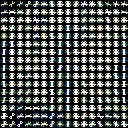

In [6]:
orientation = 9
pixels_per_cell = 8
cells_per_block = 2
hog_img(img1, orientation, pixels_per_cell, cells_per_block)

Orientation 8
pixels_per_cell 8x8
cells_per_block 2
0.05 segundos


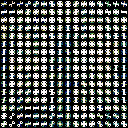

In [7]:
orientation = 8
pixels_per_cell = 8
cells_per_block = 2
hog_img(img1, orientation, pixels_per_cell, cells_per_block)

Orientation 7
pixels_per_cell 8x8
cells_per_block 2
0.04 segundos


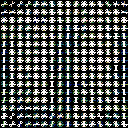

In [8]:
orientation = 7
pixels_per_cell = 8
cells_per_block = 2
hog_img(img1, orientation, pixels_per_cell, cells_per_block)

Pruebo diferentes valores de pixels_per_cell

Orientation 9
pixels_per_cell 8x8
cells_per_block 2
0.05 segundos


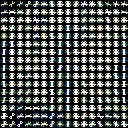

In [9]:
orientation = 9
pixels_per_cell = 8
cells_per_block = 2
hog_img(img1, orientation, pixels_per_cell, cells_per_block)

Orientation 9
pixels_per_cell 16x16
cells_per_block 2
0.02 segundos


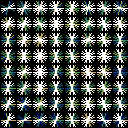

In [10]:
orientation = 9
pixels_per_cell = 16
cells_per_block = 2
hog_img(img1, orientation, pixels_per_cell, cells_per_block)

Orientation 9
pixels_per_cell 4x4
cells_per_block 2
0.17 segundos


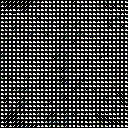

In [11]:
orientation = 9
pixels_per_cell = 4
cells_per_block = 2
hog_img(img1, orientation, pixels_per_cell, cells_per_block)

Pruebo diferentes valores de cells_per_block

Orientation 9
pixels_per_cell 8x8
cells_per_block 2
0.05 segundos


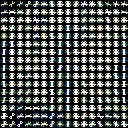

In [12]:
orientation = 9
pixels_per_cell = 8
cells_per_block = 2
hog_img(img1, orientation, pixels_per_cell, cells_per_block)

Orientation 9
pixels_per_cell 8x8
cells_per_block 4
0.05 segundos


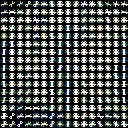

In [13]:
orientation = 9
pixels_per_cell = 8
cells_per_block = 4
hog_img(img1, orientation, pixels_per_cell, cells_per_block)

Orientation 9
pixels_per_cell 8x8
cells_per_block 8
0.05 segundos


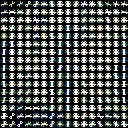

In [14]:
orientation = 9
pixels_per_cell = 8
cells_per_block = 8
hog_img(img1, orientation, pixels_per_cell, cells_per_block)

In [15]:
# Aplica hog para una única imágen
def get_single_hogged_img(id, orient, pixels, cells):
    img = Image.open(f'{raw_128_dir}/{id}')
    fd, hoggedImg = hog(img, orientations=orient, pixels_per_cell=(pixels, pixels), cells_per_block=(cells, cells), visualize=True)
    img.close()
    return fd, hoggedImg

# prueba
img_test = df['image_id'][0]
print(img_test)
get_single_hogged_img(img_test, 9, 8, 2)

003d8fa0-6bf1-40ed-b54c-ac657f8495c5.png


(array([0.01217047, 0.0027214 , 0.37465014, ..., 0.34867394, 0.34867394,
        0.34867394]),
 array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.17469281,  0.        ],
        ...,
        [ 0.        ,  8.76783097,  0.        , ...,  0.        ,
         10.0152514 ,  0.        ],
        [ 0.        ,  0.        , 12.42772961, ..., 12.21224213,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]))

In [16]:
normal = 'normal'
pneumonia = 'pneumonia'
covid = 'COVID-19'

def disease_to_num(x):
    if x == normal:
        return 0
    elif x == pneumonia:
        return 1
    elif x == covid:
        return 2
    else:
        return x

disease_to_num(df['disease'][0])

0

In [17]:
df['disease'] = df['disease'].apply(lambda x: disease_to_num(x))
print(df['disease'][0])

0


In [18]:
# Aplica hog a un conjunto de imágenes con unos determinados parámetros de hog, y guarda los resultados en un csv
def get_hogged_imgs(df, orient, pixels, cells):
    features = []
    start = time.time()
    for img_id in df['image_id']:
        fd, hoggedImg = get_single_hogged_img(img_id, orient, pixels, cells)
        features.append(fd)
    end = time.time()
    path = features_csv_path(orient, pixels, cells)
    print('Orientation', orient, 'Pixels', pixels, 'Cells', cells, 'Time', round(end - start , 2), 'segundos', path)
    np_feat = numpy.array(features)
    numpy.save(path, np_feat)


In [19]:
cells = [2, 4, 8]
pixels = [8, 16]
orientations = [7, 8, 9]

for orien in orientations:
    for pix in pixels:
        for cell in cells:
            get_hogged_imgs(df, orien, pix, cell)


Orientation 7 Pixels 8 Cells 2 Time 10.0 segundos ../data/processed/or7pix8cell2
Orientation 7 Pixels 8 Cells 4 Time 8.91 segundos ../data/processed/or7pix8cell4
Orientation 7 Pixels 8 Cells 8 Time 8.86 segundos ../data/processed/or7pix8cell8
Orientation 7 Pixels 16 Cells 2 Time 2.74 segundos ../data/processed/or7pix16cell2
Orientation 7 Pixels 16 Cells 4 Time 2.53 segundos ../data/processed/or7pix16cell4
Orientation 7 Pixels 16 Cells 8 Time 2.33 segundos ../data/processed/or7pix16cell8
Orientation 8 Pixels 8 Cells 2 Time 10.48 segundos ../data/processed/or8pix8cell2
Orientation 8 Pixels 8 Cells 4 Time 10.51 segundos ../data/processed/or8pix8cell4
Orientation 8 Pixels 8 Cells 8 Time 9.47 segundos ../data/processed/or8pix8cell8
Orientation 8 Pixels 16 Cells 2 Time 3.01 segundos ../data/processed/or8pix16cell2
Orientation 8 Pixels 16 Cells 4 Time 2.79 segundos ../data/processed/or8pix16cell4
Orientation 8 Pixels 16 Cells 8 Time 2.65 segundos ../data/processed/or8pix16cell8
Orientation 9 

In [20]:
example_df = numpy.load(f'{features_csv_path(orien, pix, cell)}.npy')
print(example_df)

[[0.00455923 0.00115755 0.05208647 ... 0.14924997 0.08401227 0.11228966]
 [0.01324185 0.00589307 0.02125721 ... 0.05266199 0.08082429 0.06565159]
 [0.01973083 0.02336076 0.06495314 ... 0.12331961 0.11641069 0.11256974]
 ...
 [0.12882586 0.02974305 0.0416403  ... 0.04469102 0.03383542 0.01747526]
 [0.16830736 0.041195   0.02112075 ... 0.12548267 0.08435948 0.03916152]
 [0.20766722 0.03653763 0.0689219  ... 0.01227842 0.01446569 0.07879268]]


In [21]:
scoring = {'recall0': make_scorer(recall_score, average = None, labels = [0]), 
       'recall1': make_scorer(recall_score, average = None, labels = [1]),
       'recall2': make_scorer(recall_score, average = None, labels = [2]),
       'precision0': make_scorer(precision_score, average = None, labels = [0]),
       'precision1': make_scorer(precision_score, average = None, labels = [1]),
       'precision2': make_scorer(precision_score, average = None, labels = [2]),
       'roc_auc_score0': make_scorer(roc_auc_score, average = None, labels = [0],
       'roc_auc_score1': make_scorer(roc_auc_score, average = None, labels = [1],
       'roc_auc_score2': make_scorer(roc_auc_score, average = None, labels = [2],)
}

In [22]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) 

In [30]:
x = numpy.load(f'{features_csv_path(orien, pix, cell)}.npy')

clf = RandomForestClassifier(min_samples_leaf=20, random_state=seed)

scores = cross_validate(clf, X=x, y=df['disease'], cv=kfold, scoring=scoring)


print('Orientation', orien, 'Pixels', pix, 'Cells', cell)
print('Recall normal:', round(scores['test_recall0'].mean(), 2))
print('Recall pneumonia:', round(scores['test_recall1'].mean(), 2))
print('Recall covid:', round(scores['test_recall2'].mean(), 2))
print('Precision normal:', round(scores['test_precision0'].mean(), 2))
print('Precision pneumonia:', round(scores['test_precision1'].mean(), 2))
print('Precision covid:', round(scores['test_precision2'].mean(), 2))

Orientation 9 Pixels 16 Cells 8
Recall normal: 0.79
Recall pneumonia: 0.64
Recall covid: 0.57
Precision normal: 0.72
Precision pneumonia: 0.65
Precision covid: 0.62


In [31]:
# Primer corrida sin tocar parámetros random Forest
cells = [2, 4, 8]
pixels = [8, 16]
orientations = [7, 8, 9]

index = 0

for orien in orientations:
    for pix in pixels:
        for cell in cells:
            x = numpy.load(f'{features_csv_path(orien, pix, cell)}.npy')
            scores = cross_validate(clf, X=x, y=df['disease'], cv=kfold, scoring=scoring)
            print(f'=========================== {index} ====================================')
            print('Orientation', orien, 'Pixels', pix, 'Cells', cell)
            print("Precision normal: %0.2f (+/- %0.2f)" % (scores['test_precision0'].mean(), scores['test_precision0'].std() * 2))
            print("Recall normal: %0.2f (+/- %0.2f)" % (scores['test_recall0'].mean(), scores['test_recall0'].std() * 2))
            print("Precision pneumonia: %0.2f (+/- %0.2f)" % (scores['test_precision1'].mean(), scores['test_precision1'].std() * 2))
            print("Recall pneumonia: %0.2f (+/- %0.2f)" % (scores['test_recall1'].mean(), scores['test_recall1'].std() * 2))
            print("Precision covid: %0.2f (+/- %0.2f)" % (scores['test_precision2'].mean(), scores['test_precision2'].std() * 2))
            print("Recall covid: %0.2f (+/- %0.2f) \n" % (scores['test_recall2'].mean(), scores['test_recall2'].std() * 2))
            index = index + 1


=========================== 0 ====================================
Orientation 7 Pixels 8 Cells 2
Precision normal: 0.69 (+/- 0.07)
Recall normal: 0.81 (+/- 0.15)
Precision pneumonia: 0.59 (+/- 0.15)
Recall pneumonia: 0.59 (+/- 0.18)
Precision covid: 0.64 (+/- 0.12)
Recall covid: 0.52 (+/- 0.16) 

=========================== 1 ====================================
Orientation 7 Pixels 8 Cells 4
Precision normal: 0.72 (+/- 0.16)
Recall normal: 0.79 (+/- 0.12)
Precision pneumonia: 0.60 (+/- 0.28)
Recall pneumonia: 0.60 (+/- 0.21)
Precision covid: 0.54 (+/- 0.12)
Recall covid: 0.47 (+/- 0.20) 

=========================== 2 ====================================
Orientation 7 Pixels 8 Cells 8
Precision normal: 0.70 (+/- 0.17)
Recall normal: 0.83 (+/- 0.16)
Precision pneumonia: 0.63 (+/- 0.26)
Recall pneumonia: 0.52 (+/- 0.08)
Precision covid: 0.56 (+/- 0.08)
Recall covid: 0.54 (+/- 0.10) 

=========================== 3 ====================================
Orientation 7 Pixels 16 Cells 2
Prec

In [32]:
# Grid search para buscar mejores parámetros de árbol

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy


param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120, 150, 200, 500, 1000],
    'max_features': [2, 3, 4, 5, 10],
    'min_samples_leaf': [3, 4, 5, 10, 50, 100],
    'min_samples_split': [8, 10, 12, 24, 60, 100],
    'n_estimators': [100, 200, 300, 500, 1000, 5000],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=seed)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x, df['disease'])


Fitting 3 folds for each of 19440 candidates, totalling 58320 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=14061996),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110, 120, 150, 200, 500,
                                       1000],
                         'max_features': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [3, 4, 5, 10, 50, 100],
                         'min_samples_split': [8, 10, 12, 24, 60, 100],
                         'n_estimators': [100, 200, 300, 500, 1000, 5000]},
             verbose=2)

In [33]:
print('Mejores parámetros')
print(grid_search.best_params_)

print('Mejor estimador')
print(grid_search.best_estimator_)


Mejores parámetros
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 80, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 24, 'n_estimators': 500}
Mejor estimador
RandomForestClassifier(max_depth=80, max_features=10, min_samples_leaf=5,
                       min_samples_split=24, n_estimators=500,
                       random_state=14061996)


In [34]:
# Segunda corrida usando mejores parámetros
clf = RandomForestClassifier(
    bootstrap=True,
    criterion='gini',
    max_depth=80, 
    max_features=10, 
    min_samples_leaf=5, 
    min_samples_split=24, 
    n_estimators=500, 
    random_state=seed
)


# variaciones hog
cells = [2, 4, 8]
pixels = [8, 16]
orientations = [7, 8, 9]


# random forest
# criterion = ['gini', 'entropy']


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) 

index = 0

for orien in orientations:
    for pix in pixels:
        for cell in cells:
            x = numpy.load(f'{features_csv_path(orien, pix, cell)}.npy')
            scores = cross_validate(clf, X=x, y=df['disease'], cv=kfold, scoring=scoring)
            print(f'=========================== {index} ====================================')
            print('Orientation', orien, 'Pixels', pix, 'Cells', cell)
            print("Precision normal: %0.2f (+/- %0.2f)" % (scores['test_precision0'].mean(), scores['test_precision0'].std() * 2))
            print("Recall normal: %0.2f (+/- %0.2f)" % (scores['test_recall0'].mean(), scores['test_recall0'].std() * 2))
            print("Precision pneumonia: %0.2f (+/- %0.2f)" % (scores['test_precision1'].mean(), scores['test_precision1'].std() * 2))
            print("Recall pneumonia: %0.2f (+/- %0.2f)" % (scores['test_recall1'].mean(), scores['test_recall1'].std() * 2))
            print("Precision covid: %0.2f (+/- %0.2f)" % (scores['test_precision2'].mean(), scores['test_precision2'].std() * 2))
            print("Recall covid: %0.2f (+/- %0.2f) \n" % (scores['test_recall2'].mean(), scores['test_recall2'].std() * 2))
            index = index + 1



=========================== 0 ====================================
Orientation 7 Pixels 8 Cells 2
Precision normal: 0.71 (+/- 0.09)
Recall normal: 0.84 (+/- 0.12)
Precision pneumonia: 0.59 (+/- 0.22)
Recall pneumonia: 0.59 (+/- 0.21)
Precision covid: 0.61 (+/- 0.18)
Recall covid: 0.49 (+/- 0.18) 

=========================== 1 ====================================
Orientation 7 Pixels 8 Cells 4
Precision normal: 0.71 (+/- 0.12)
Recall normal: 0.86 (+/- 0.12)
Precision pneumonia: 0.62 (+/- 0.24)
Recall pneumonia: 0.59 (+/- 0.23)
Precision covid: 0.62 (+/- 0.15)
Recall covid: 0.51 (+/- 0.19) 

=========================== 2 ====================================
Orientation 7 Pixels 8 Cells 8
Precision normal: 0.72 (+/- 0.20)
Recall normal: 0.87 (+/- 0.12)
Precision pneumonia: 0.67 (+/- 0.27)
Recall pneumonia: 0.57 (+/- 0.05)
Precision covid: 0.63 (+/- 0.16)
Recall covid: 0.55 (+/- 0.19) 

=========================== 3 ====================================
Orientation 7 Pixels 16 Cells 2
Prec